In [9]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [10]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [12]:
x_train /= 255
x_test /= 255

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 35s 17ms/step - loss: 0.2038 - accuracy: 0.9390
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0830 - accuracy: 0.9743
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0577 - accuracy: 0.9815
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0433 - accuracy: 0.9865
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0368 - accuracy: 0.9880
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0295 - accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0271 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0218 - accuracy: 0.9922
Epoch 9/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0200 - accuracy: 0.9933
Epoch 10/10
1875/1875 [==============================] - 32s 17m

In [15]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0616 - accuracy: 0.9853


[0.06156874820590019, 0.9853000044822693]

8


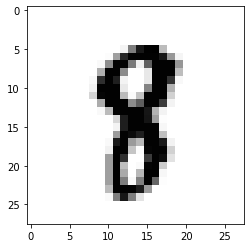

In [18]:
image_index = 2856
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())